In [114]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier, export_graphviz





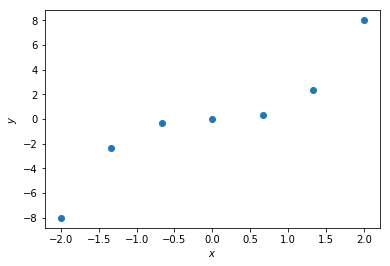

In [9]:
X = np.linspace(-2, 2, 7)
y = X ** 3


plt.scatter(X, y)
plt.xlabel(r'$x$')
plt.ylabel(r'$y$');

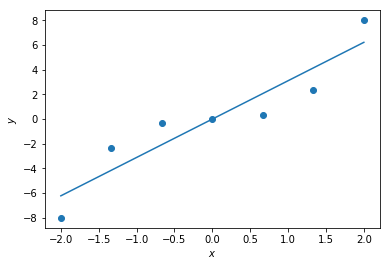

In [18]:
from numpy.polynomial.polynomial import polyfit

X = np.linspace(-2, 2, 7)
y = X ** 3

plt.scatter(X, y)
plt.xlabel(r'$x$')
plt.ylabel(r'$y$');

# Predictions of this tree look like for x∈[−2,2]
# Fit with polyfit
b, m = polyfit(X, y, 1)

plt.plot(X, b + m * X, '-')
plt.show()


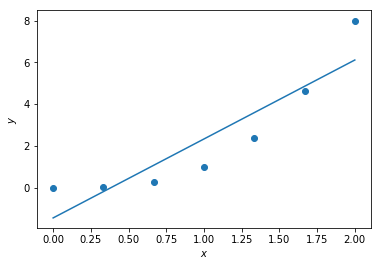

In [21]:
X = np.linspace(0, 2, 7)
y = X ** 3

plt.scatter(X, y)
plt.xlabel(r'$x$')
plt.ylabel(r'$y$');

# Split the data according to the following condition [x<0]
# Fit with polyfit
b, m = polyfit(X, y, 1)

plt.plot(X, b + m * X, '-')
plt.show()

In [97]:
def regression_var_criterion(X, y, t):
    left = []
    right = []
    Q = 0
    for x in X:
        if x <= t:
            left.append(x)
        else:
            right.append(x)
    
    Q = np.var(X) - (len(left)/len(X))*np.var(left) - (len(right)/len(X))*np.var(right)
    return Q
    
    
    

Text(0,0.5,'$y$')

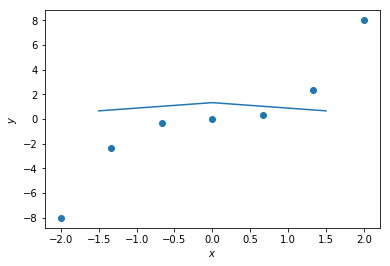

In [100]:
X = np.linspace(-2, 2, 7)
y = X ** 3

tt = [-1.5, 0, 1.5]

plt.scatter(X, y)
plt.plot([t for t in tt], [regression_var_criterion(X, y, t) for t in tt])


plt.xlabel(r'$x$')
plt.ylabel(r'$y$')


In [7]:
pass


In [145]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier, export_graphviz

df = pd.read_csv('cardiovascular_train.csv', index_col='id', sep=';')
df['age'] = (df['age'] * (1/365)).apply(np.floor)

df = pd.get_dummies(data=df, columns=['cholesterol', 'gluc'])
df.head()

# You code here
# X_train, X_valid, y_train, y_valid = ...
X_train, X_holdout, y_train, y_holdout = train_test_split(df.drop('cardio', axis=1), df['cardio'], test_size=.3, random_state=17)

from sklearn.tree import DecisionTreeClassifier

clf_tree = DecisionTreeClassifier(max_depth=3, random_state=17)

# training the tree
clf_tree.fit(X_train, y_train)




DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=17,
            splitter='best')

In [146]:
from sklearn.metrics import accuracy_score

In [159]:
pred_holdout = clf_tree.predict(X_holdout)

In [160]:
pred_holdout.shape, y_holdout.shape

((21000,), (21000,))

In [161]:
accuracy_score(y_holdout, pred_holdout)

0.7212857142857143

In [162]:
import numpy as np
df['cardio'].value_counts(normalize=True)

0    0.5003
1    0.4997
Name: cardio, dtype: float64

In [163]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold

In [164]:
params = {'max_depth': np.arange(2,11), 'min_samples_leaf': np.arange(1,11)}

In [165]:
skf = StratifiedKFold(n_splits=6, shuffle=True, random_state=17)

In [166]:
best_tree = GridSearchCV(estimator=clf_tree, param_grid=params, cv=skf, n_jobs=-1, verbose=1)

In [167]:
best_tree.fit(X_train, y_train)

Fitting 6 folds for each of 90 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:    8.9s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:   25.2s
[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed:   31.8s finished


GridSearchCV(cv=StratifiedKFold(n_splits=6, random_state=17, shuffle=True),
       error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=17,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'max_depth': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10]), 'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [168]:
best_tree.best_params_

{'max_depth': 6, 'min_samples_leaf': 3}

In [169]:
best_tree.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=3, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=17,
            splitter='best')

In [173]:
best_tree.best_score_

0.7310204081632653

In [174]:
pred_holdout_better = best_tree.predict(X_holdout)

In [139]:
from sklearn.tree import export_graphviz

In [140]:
export_graphviz(clf_tree, out_file = 'tree.dot' ,filled=True, feature_names=df.drop('cardio', axis=1).columns)

In [141]:
!cat *.dot


digraph Tree {
node [shape=box, style="filled", color="black"] ;
0 [label="ap_hi <= 129.5\ngini = 0.5\nsamples = 49000\nvalue = [24531, 24469]", fillcolor="#e5813901"] ;
1 [label="age <= 54.5\ngini = 0.433\nsamples = 28925\nvalue = [19758, 9167]", fillcolor="#e5813989"] ;
0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;
2 [label="cholesterol_3 <= 0.5\ngini = 0.361\nsamples = 17891\nvalue = [13664, 4227]", fillcolor="#e58139b0"] ;
1 -> 2 ;
3 [label="gini = 0.345\nsamples = 17130\nvalue = [13338, 3792]", fillcolor="#e58139b7"] ;
2 -> 3 ;
4 [label="gini = 0.49\nsamples = 761\nvalue = [326, 435]", fillcolor="#399de540"] ;
2 -> 4 ;
5 [label="cholesterol_3 <= 0.5\ngini = 0.495\nsamples = 11034\nvalue = [6094, 4940]", fillcolor="#e5813930"] ;
1 -> 5 ;
6 [label="gini = 0.486\nsamples = 9881\nvalue = [5762, 4119]", fillcolor="#e5813949"] ;
5 -> 6 ;
7 [label="gini = 0.41\nsamples = 1153\nvalue = [332, 821]", fillcolor="#399de598"] ;
5 -> 7 ;
8 [label="ap_hi <= 138.5\ngini = 0.362\ns